In [21]:
# Basic Imports
import sys
sys.path.insert(1, "../../")

import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm

# Evaluation Imports
from sklearn.metrics import mean_squared_error
from math import sqrt

In [22]:
# Configurations
isDemoMode = True
DATA_FILE_NAME = '../../Data/final_crypto_data.csv'
SELECTED_MONTHS = [10,11,12,1,2,3]

In [23]:
print(f"Default number of DF columns displayed {pd.get_option('display.max_columns')}")

# settings to display all columns
pd.set_option("display.max_columns", None)

Default number of DF columns displayed None


In [24]:
df = pd.read_csv(DATA_FILE_NAME)
df

,Unnamed: 0,_id,high_24h,last_24h,unix_timestamp,bid_24h,vwap_24h,volume_24h,low_24h,ask_24h,open_24h,high_1min,volume_1min,low_1min,close_1min,open_1min,max_supply,circulating_supply,total_supply,quote_USD_price,quote_volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,reddit_compound_polarity
0,0,627127fabbd592fa2c7f25a9,62971.54,62561.13,1635527368,62559.74,60908.08,5113.537402,56425.0,62561.13,60608.95,62565.90,1.425169,62539.20,62561.86,62545.45,21000000.0,18858012.0,18858012.0,62556.005047,4.304916e+10,6.0514,-0.314446,2.307206,2.108769,26.873643,29.933036,49.972913,1.179682e+12,43.4826,1.313676e+12,0.000834
1,1,627127fabbd592fa2c7f25aa,62971.54,62580.05,1635527309,62571.40,60907.24,5111.938615,56425.0,62580.05,60608.95,62580.05,0.046548,62555.88,62577.47,62555.88,21000000.0,18858012.0,18858012.0,62530.948307,4.305221e+10,6.0179,-0.422853,2.137546,2.146984,26.873643,29.917416,49.972913,1.179209e+12,43.4826,1.313150e+12,0.000834
2,2,627127fabbd592fa2c7f25ab,62971.54,62591.17,1635527428,62582.19,60908.89,5115.569587,56425.0,62596.03,60608.95,62597.65,2.112533,62555.02,62597.64,62560.95,21000000.0,18858012.0,18858012.0,62551.924819,4.304739e+10,6.0643,-0.365020,2.383982,2.150485,26.873643,29.997052,49.972913,1.179605e+12,43.4826,1.313590e+12,0.000834
3,3,627127fabbd592fa2c7f25ac,62971.54,62590.43,1635527672,62572.06,60909.91,5117.061581,56425.0,62590.43,60608.95,62615.00,0.596406,62590.43,62590.43,62603.62,21000000.0,18858012.0,18858012.0,62591.537709,4.311295e+10,6.1673,-0.311393,2.375399,2.464668,26.873643,30.044297,49.972913,1.180352e+12,43.4826,1.314422e+12,0.000834
4,4,627127fabbd592fa2c7f25ad,62971.54,62600.43,1635527551,62587.09,60909.54,5117.193435,56425.0,62606.26,60608.95,62600.43,0.657752,62577.18,62600.43,62577.18,21000000.0,18858012.0,18858012.0,62584.316178,4.310036e+10,6.1706,-0.379612,2.422122,2.443523,26.873643,30.074340,49.972913,1.180216e+12,43.4826,1.314271e+12,0.000834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246786,246786,62712800bbd592fa2c82e9ab,38786.95,38327.07,1651352348,38304.93,38539.95,566.041421,38160.4,38326.82,38599.30,38327.07,0.000650,38327.07,38327.07,38327.07,21000000.0,19026825.0,19026825.0,38334.504957,2.115848e+10,-24.4114,-0.363037,-0.606400,-3.693057,-16.314320,-12.909292,1.689268,7.293839e+11,42.0516,8.050246e+11,0.000800
246787,246787,62712800bbd592fa2c82e9ac,38786.95,38332.23,1651352290,38314.66,38539.96,566.041421,38160.4,38335.17,38599.30,38332.23,0.000000,38332.23,38332.23,38332.23,21000000.0,19026825.0,19026825.0,38332.043361,2.114067e+10,-24.4769,-0.344114,-0.592877,-3.713096,-16.308426,-12.839252,1.692403,7.293371e+11,42.0489,8.049729e+11,0.000800
246788,246788,62712800bbd592fa2c82e9ad,38786.95,38329.94,1651352410,38317.93,38539.93,566.041421,38160.4,38330.19,38599.30,38317.93,0.007191,38317.93,38317.93,38317.93,21000000.0,19026825.0,19026825.0,38337.264339,2.115928e+10,-24.4040,-0.345789,-0.598362,-3.683293,-16.296175,-12.917047,1.698228,7.294364e+11,42.0546,8.050826e+11,0.000800
246789,246789,62712800bbd592fa2c82e9ae,38786.95,38344.79,1651352469,38321.67,38539.90,566.041421,38160.4,38344.79,38599.30,38344.79,0.000000,38344.79,38344.79,38344.79,21000000.0,19026825.0,19026825.0,38334.446382,2.115736e+10,-24.4076,-0.354289,-0.602308,-3.686438,-16.303936,-12.928782,1.698071,7.293828e+11,42.0515,8.050234e+11,0.000800


In [25]:
# Drop unnecessary columns
df = utils.setDateTimeAsIndex(df)
df = utils.filterInMonths(df, SELECTED_MONTHS)
df

,Unnamed: 0,_id,high_24h,last_24h,bid_24h,vwap_24h,volume_24h,low_24h,ask_24h,open_24h,high_1min,volume_1min,low_1min,close_1min,open_1min,max_supply,circulating_supply,total_supply,quote_USD_price,quote_volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,reddit_compound_polarity
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-29 17:09:28,0,627127fabbd592fa2c7f25a9,62971.54,62561.13,62559.74,60908.08,5113.537402,56425.0,62561.13,60608.95,62565.90,1.425169,62539.20,62561.86,62545.45,21000000.0,18858012.0,18858012.0,62556.005047,4.304916e+10,6.0514,-0.314446,2.307206,2.108769,26.873643,29.933036,49.972913,1.179682e+12,43.4826,1.313676e+12,0.000834
2021-10-29 17:08:29,1,627127fabbd592fa2c7f25aa,62971.54,62580.05,62571.40,60907.24,5111.938615,56425.0,62580.05,60608.95,62580.05,0.046548,62555.88,62577.47,62555.88,21000000.0,18858012.0,18858012.0,62530.948307,4.305221e+10,6.0179,-0.422853,2.137546,2.146984,26.873643,29.917416,49.972913,1.179209e+12,43.4826,1.313150e+12,0.000834
2021-10-29 17:10:28,2,627127fabbd592fa2c7f25ab,62971.54,62591.17,62582.19,60908.89,5115.569587,56425.0,62596.03,60608.95,62597.65,2.112533,62555.02,62597.64,62560.95,21000000.0,18858012.0,18858012.0,62551.924819,4.304739e+10,6.0643,-0.365020,2.383982,2.150485,26.873643,29.997052,49.972913,1.179605e+12,43.4826,1.313590e+12,0.000834
2021-10-29 17:14:32,3,627127fabbd592fa2c7f25ac,62971.54,62590.43,62572.06,60909.91,5117.061581,56425.0,62590.43,60608.95,62615.00,0.596406,62590.43,62590.43,62603.62,21000000.0,18858012.0,18858012.0,62591.537709,4.311295e+10,6.1673,-0.311393,2.375399,2.464668,26.873643,30.044297,49.972913,1.180352e+12,43.4826,1.314422e+12,0.000834
2021-10-29 17:12:31,4,627127fabbd592fa2c7f25ad,62971.54,62600.43,62587.09,60909.54,5117.193435,56425.0,62606.26,60608.95,62600.43,0.657752,62577.18,62600.43,62577.18,21000000.0,18858012.0,18858012.0,62584.316178,4.310036e+10,6.1706,-0.379612,2.422122,2.443523,26.873643,30.074340,49.972913,1.180216e+12,43.4826,1.314271e+12,0.000834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-29 15:03:51,206562,627127ffbbd592fa2c824c8b,48234.00,47841.78,47821.47,47686.37,2055.574837,46897.0,47841.83,47152.38,47841.78,0.032706,47779.93,47841.78,47787.41,21000000.0,18997287.0,18997287.0,47796.800709,3.593814e+10,-11.6642,0.220574,0.405000,11.727515,23.065838,29.951735,-0.127362,9.080095e+11,41.9541,1.003733e+12,-0.260219
2022-03-29 15:02:51,206563,627127ffbbd592fa2c824c8c,48234.00,47817.06,47781.38,47686.37,2055.589733,46897.0,47804.30,47152.38,47839.85,1.175399,47817.06,47817.06,47823.15,21000000.0,18997287.0,18997287.0,47796.800709,3.593814e+10,-11.6642,0.220574,0.405000,11.727515,23.065838,29.951735,-0.127362,9.080095e+11,41.9541,1.003733e+12,-0.329272
2022-03-29 15:04:51,206564,627127ffbbd592fa2c824c8d,48234.00,47839.81,47813.47,47686.46,2054.541798,46897.0,47834.63,47152.38,47842.74,0.016080,47839.81,47839.81,47842.74,21000000.0,18997287.0,18997287.0,47758.428512,3.581643e+10,-11.9431,0.088208,0.447990,11.702487,23.073256,29.909264,-0.197507,9.072806e+11,41.9258,1.002927e+12,-0.260219


In [26]:
len(df)

206567

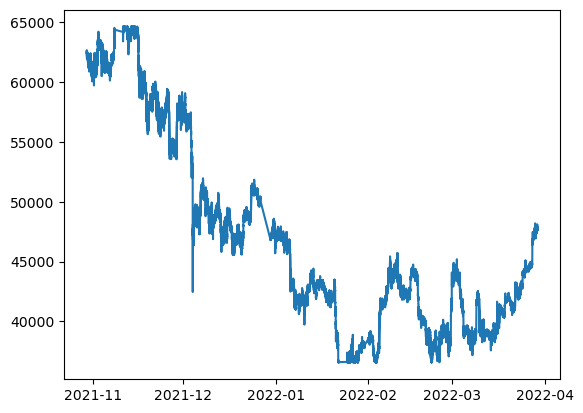

In [27]:
plt.plot(df.index, df['close_1min'] )
plt.show()

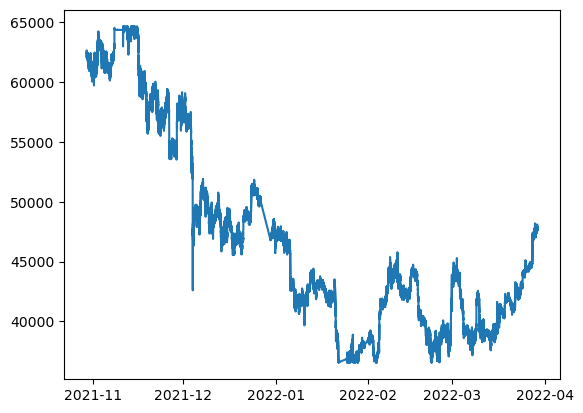

In [28]:
plt.plot(df.index, df['open_1min'])
plt.show()

In [29]:
n_steps = 15
X, y = utils.split_sequence(df['close_1min'], n_steps)
X

array([[62561.86, 62577.47, 62597.64, ..., 62525.3 , 62636.31, 62622.96],
       [62577.47, 62597.64, 62590.43, ..., 62636.31, 62622.96, 62531.42],
       [62597.64, 62590.43, 62600.43, ..., 62622.96, 62531.42, 62630.83],
       ...,
       [47816.63, 47874.67, 47848.79, ..., 47846.27, 47841.78, 47817.06],
       [47874.67, 47848.79, 47850.35, ..., 47841.78, 47817.06, 47839.81],
       [47848.79, 47850.35, 47853.63, ..., 47817.06, 47839.81, 47852.52]])

In [30]:
train_X, train_y, valid_X, valid_y, _, _ = utils.train_test_valid_split(
        X,
        y,
        train_size=0.8,
        valid_size=0.1
    )
print("----------------------------")
print(f"-------- Train X: {train_X.shape}, Train y: {train_y.shape} --------")
print(f"-------- Valid X: {valid_X.shape}, Valid y: {valid_y.shape} --------")
# print(f"-------- Test X: {test_X.shape}, Test y: {test_y.shape} --------")
print("----------------------------\n")

-------- train test valid split --------
165241
165241
20655
20655
20656
20656
----------------------------------------
----------------------------
-------- Train X: (165241, 15), Train y: (165241,) --------
-------- Valid X: (20655, 15), Valid y: (20655,) --------
----------------------------



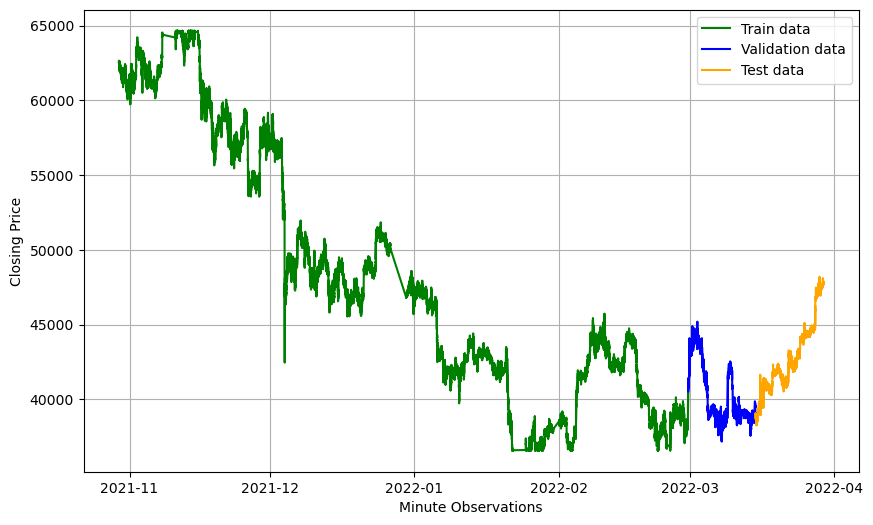

In [31]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(df['close_1min'][:len(train_y)], 'green', label='Train data')
plt.plot(df['close_1min'][len(train_y):len(train_y)+len(valid_y)], 'blue', label='Validation data')
plt.plot(df['close_1min'][len(train_y)+len(valid_y):], 'orange', label='Test data')
plt.legend()

In [32]:
total_len = len(train_y)+len(valid_y)
# Fit the ARIMA model to the training data
model = sm.tsa.ARIMA(df["close_1min"], order=(4,1,0))
results = model.fit()

/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             close_1min   No. Observations:               206567
Model:                 ARIMA(4, 1, 0)   Log Likelihood            -1166078.062
Date:                Sat, 14 Jan 2023   AIC                        2332166.124
Time:                        15:07:04   BIC                        2332217.316
Sample:                             0   HQIC                       2332181.170
                             - 206567                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4832      0.000  -1317.753      0.000      -0.484      -0.483
ar.L2         -0.1933      0.001   -378.914      0.000      -0.194      -0.192
ar.L3         -0.0661      0.001   -118.929      0.000      -0.067      -0.065
ar.L4         -0.0078      0.000    -16.207      0.000      -0.009      -0.007
sigma2      4685.5495      2.068   2265.652      0.000    4681.496    4689.603
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         103875865.16
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                            -1.51
Prob(H) (two-sided):                  0.00   Kurtosis:                       112.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
valid_predictions = results.predict(start=len(train_X), end=total_len-1)
valid_predictions

datetime
2022-02-28 15:37:52    40598.763244
2022-02-28 15:38:53    40606.710657
2022-02-28 15:39:53    40644.844371
2022-02-28 15:40:53    40639.150030
2022-02-28 15:41:53    40632.321053
                           ...     
2022-03-15 02:55:23    39008.388170
2022-03-15 02:33:07    39008.104724
2022-03-15 02:56:24    38956.944335
2022-03-15 02:57:22    38982.560335
2022-03-15 03:00:26    38982.115423
Name: predicted_mean, Length: 20655, dtype: float64

In [35]:
valid_y

array([40725.49, 40721.79, 40714.55, ..., 38933.85, 39024.36, 38946.2 ])

In [36]:
# calculating prediction error.
# calculate RMSE
rmse = sqrt(mean_squared_error(df[len(train_X):total_len]['close_1min'], valid_predictions))
print('RNSE error = %.3f ' %rmse)

RNSE error = 65.570 


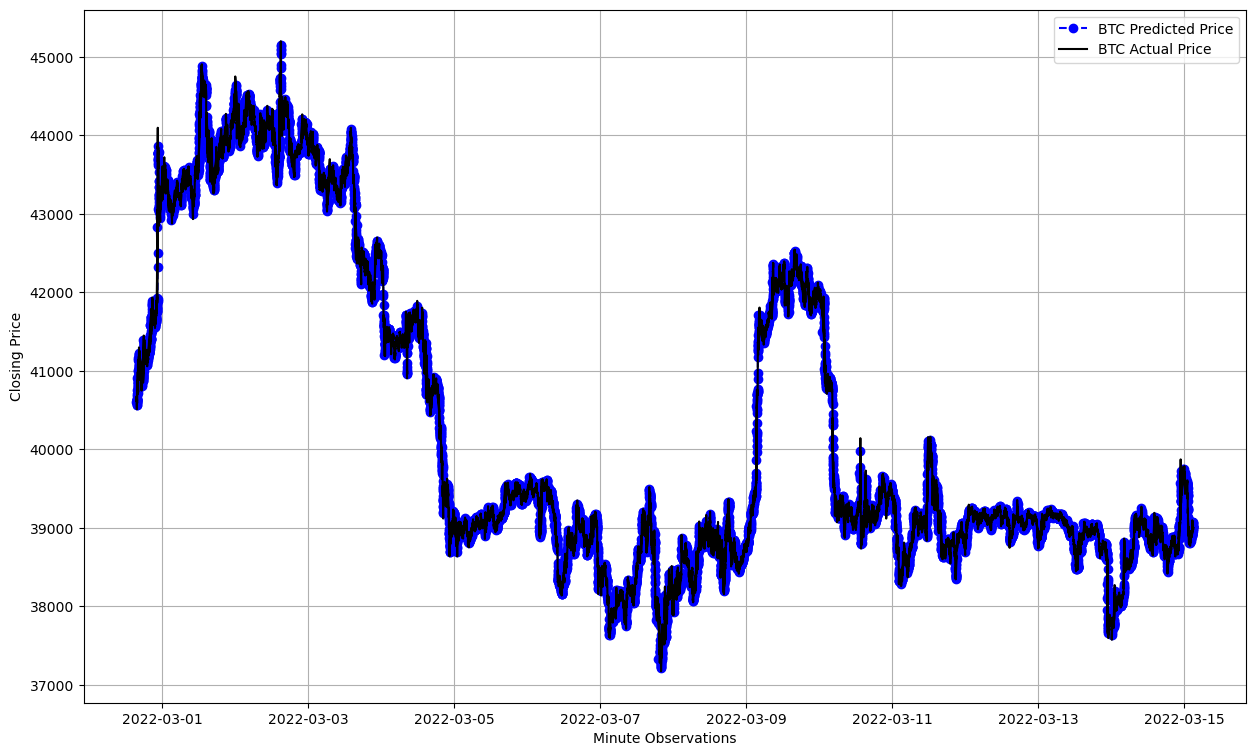

In [37]:
plt.figure(figsize=(15,9))
plt.grid(True)

data_range = df[len(train_y):len(train_y)+len(valid_y)].index

plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(valid_predictions, color='blue', marker="o", linestyle="dashed", label='BTC Predicted Price')
plt.plot(df[len(train_X):total_len]['close_1min'], 'black', label='BTC Actual Price')
plt.legend()

In [38]:
test_predictions = results.predict(start=total_len, end=len(df)-1)
test_predictions

datetime
2022-03-15 02:58:24    38988.874305
2022-03-15 02:59:26    38992.974594
2022-03-15 03:04:28    38986.540779
2022-03-15 03:06:31    38966.494760
2022-03-15 02:37:12    38960.985632
                           ...     
2022-03-29 15:03:51    47844.699369
2022-03-29 15:02:51    47843.347617
2022-03-29 15:04:51    47829.783152
2022-03-29 14:54:46    47833.889262
2022-03-29 14:57:47    47843.650007
Name: predicted_mean, Length: 20671, dtype: float64

In [39]:
# calculating prediction error.
# calculate RMSE
rmse = sqrt(mean_squared_error(df[total_len:]['close_1min'], test_predictions))
print('RNSE error = %.3f ' %rmse)

RNSE error = 50.355 


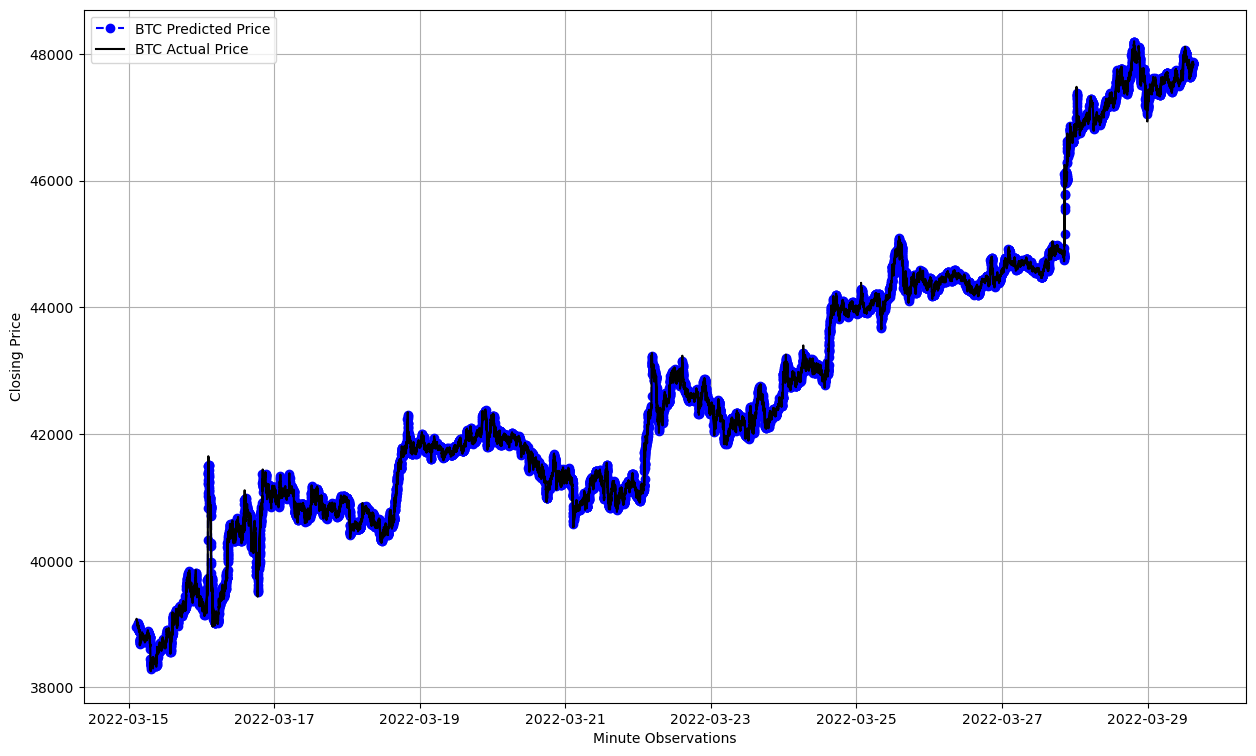

In [40]:
plt.figure(figsize=(15,9))
plt.grid(True)

data_range = df[len(train_y):len(train_y)+len(valid_y)].index

plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(test_predictions, color='blue', marker="o", linestyle="dashed", label='BTC Predicted Price')
plt.plot(df[total_len:]['close_1min'], 'black', label='BTC Actual Price')
plt.legend()